In [77]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Loading and Cleaning the Data

In [79]:
# load the data
data = pd.read_csv('space_decay.csv')


#drop the comment column and creation date
data.drop(['CREATION_DATE'], axis=1, inplace=True)
data.drop(['COMMENT'], axis=1, inplace=True)
#data.head()

In [80]:
# get all unique column names
# data.columns

In [81]:
# drop entires with TBA Object Type
data = data[data.OBJECT_TYPE != 'TBA']

data['RCS_SIZE'] = data['RCS_SIZE'].replace(to_replace={'LARGE':'Large','MEDIUM':'Medium',"SMALL":"Small"})
data['OBJECT_TYPE'] = data['OBJECT_TYPE'].replace(to_replace={'PAYLOAD':'Payload','ROCKET BODY':'Rocket Body',"DEBRIS":"Debris"})

print(data['RCS_SIZE'].unique())
print(data['OBJECT_TYPE'].unique())

['Medium' 'Small' 'Large' nan]
['Debris' 'Payload' 'Rocket Body']


In [83]:
# Create new column for the (maximum) altitude above Earth surface (Earth radius ~ 6371km)
data['ALTITUDE'] = (data['SEMIMAJOR_AXIS'] - 6371) * 0.6213

# convert the LAUNCH_DATE variables to correct format
data['LAUNCH_DATE'] = data['LAUNCH_DATE'].apply(lambda x: int(x))
# print(data['LAUNCH_DATE'].unique())

[1992 1979 2001 1999 1965 1984 1981 1985 1991 1988 1989 1966 1970 1975
 1978 1980 1977 1993 1987 1986 1990 2002 2000 1961 1963 1968 1997 1998
 2003 1971 1994 1969 1976 1982 1983 2004 1964 1962 2005 1974 2006 1967
 2007 1995 1996 2008 2009 1972 2010 2011 2012 2013 1973 2014 2015 2016
 2017 2018 2019 2020 2021]


### Plotting

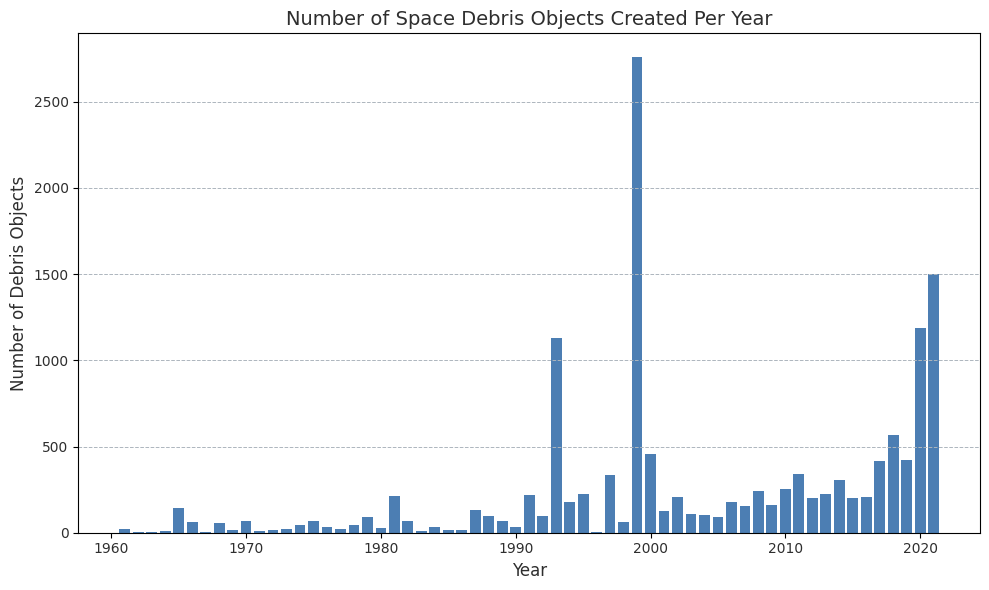

In [84]:
# Group by year to count the number of objects created each year
yearly_debris = data.groupby('LAUNCH_DATE').size().reset_index(name='Count')

# Define custom color palette
colors = {
    'Primary Blue': '#4C7EB3',
    'Star Gold': '#FFC857',
    'Satellite Gray': '#ADB5BD',
    'Rocket Red': '#FF6F61',
    'Vacuum Black': '#2E2E2E',
    'Orbital White': '#F2F2F2',
    'Nebula Purple': '#845EC2'
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_debris['LAUNCH_DATE'], yearly_debris['Count'], color=colors['Primary Blue'])

# Customize the plot
plt.title('Number of Space Debris Objects Created Per Year', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Year', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Number of Debris Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(axis='y', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

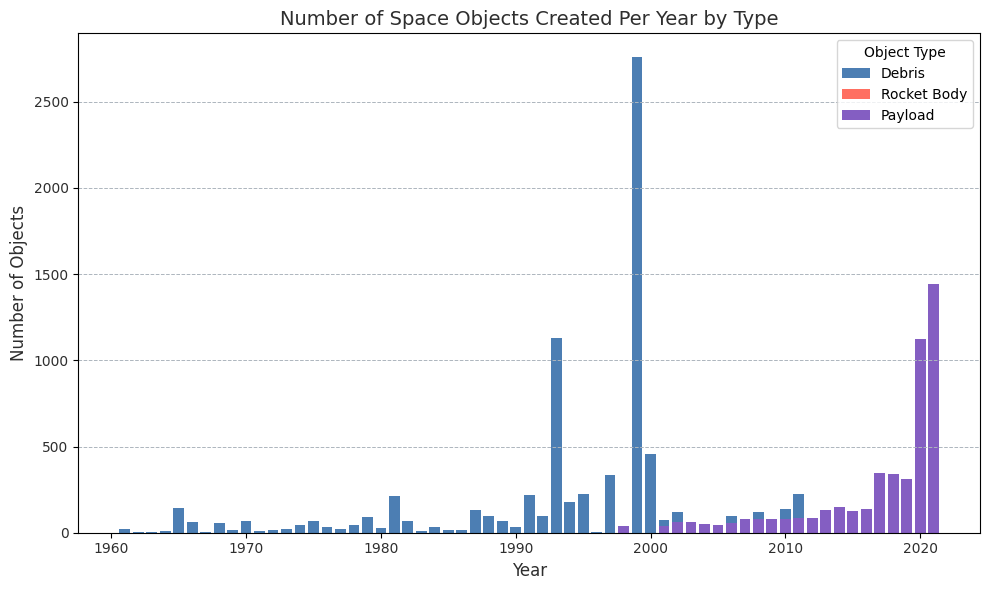

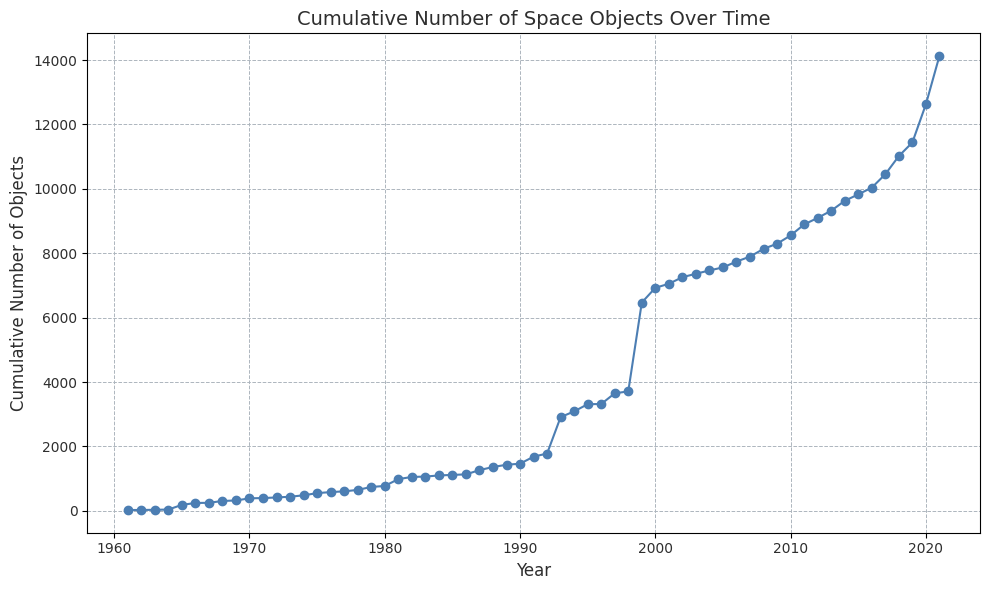

In [85]:
# Group by year and object type to count the number of objects created each year
yearly_debris_by_type = data.groupby(['LAUNCH_DATE', 'OBJECT_TYPE']).size().reset_index(name='Count')

# Group by year to calculate cumulative debris count
cumulative_debris = (
    data.groupby('LAUNCH_DATE')
    .size()
    .cumsum()
    .reset_index(name='Cumulative Count')
)

# Define the color palette
type_colors = {
    'Debris': colors['Primary Blue'],
    'Payload': colors['Nebula Purple'],
    'Rocket Body': colors['Rocket Red']
}

# Plot 1: Distinction by object types
plt.figure(figsize=(10, 6))
for obj_type in yearly_debris_by_type['OBJECT_TYPE'].unique():
    subset = yearly_debris_by_type[yearly_debris_by_type['OBJECT_TYPE'] == obj_type]
    plt.bar(subset['LAUNCH_DATE'], subset['Count'], label=obj_type, color=type_colors[obj_type])

plt.title('Number of Space Objects Created Per Year by Type', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Year', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Number of Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(axis='y', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.legend(title='Object Type')
plt.tight_layout()
plt.show()

# Plot 2: Cumulative amount of debris
plt.figure(figsize=(10, 6))
plt.plot(cumulative_debris['LAUNCH_DATE'], cumulative_debris['Cumulative Count'], color=colors['Primary Blue'], marker='o')

plt.title('Cumulative Number of Space Objects Over Time', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Year', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Cumulative Number of Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(axis='both', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.tight_layout()
plt.show()

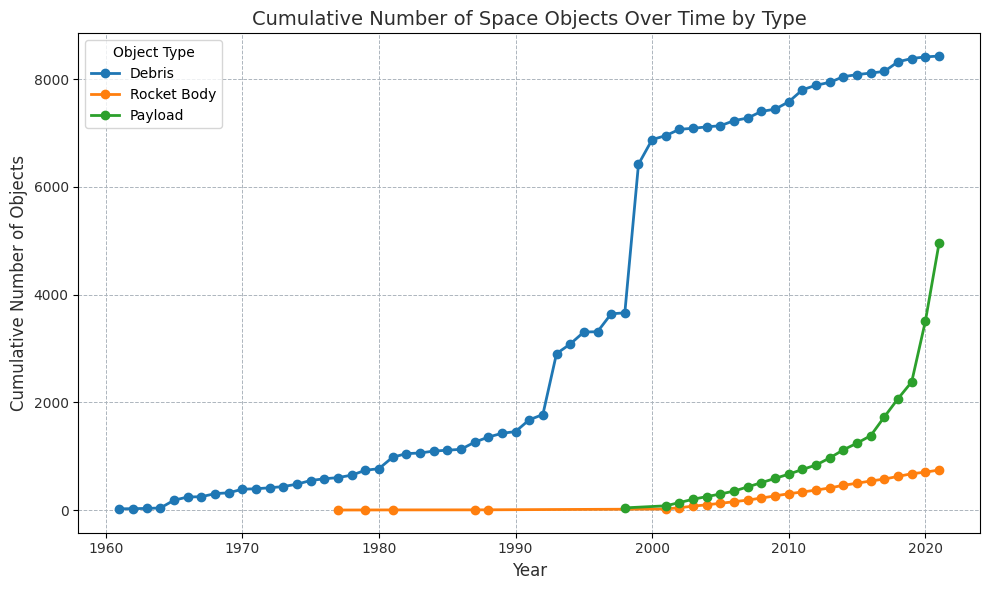

In [44]:
# Preparing cumulative debris data distinct by object types
cumulative_debris_by_type = (
    data.groupby(['LAUNCH_DATE', 'OBJECT_TYPE'])
    .size()
    .groupby(level=1)
    .cumsum()
    .reset_index(name='Cumulative Count')
)

# Plotting cumulative debris by type
plt.figure(figsize=(10, 6))
object_types = cumulative_debris_by_type['OBJECT_TYPE'].unique()

for obj_type in object_types:
    subset = cumulative_debris_by_type[cumulative_debris_by_type['OBJECT_TYPE'] == obj_type]
    plt.plot(
        subset['LAUNCH_DATE'],
        subset['Cumulative Count'],
        label=obj_type,
        marker='o',
        linewidth=2
    )

# Customizing the plot
plt.title('Cumulative Number of Space Objects Over Time by Type', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Year', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Cumulative Number of Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(axis='both', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.legend(title='Object Type', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

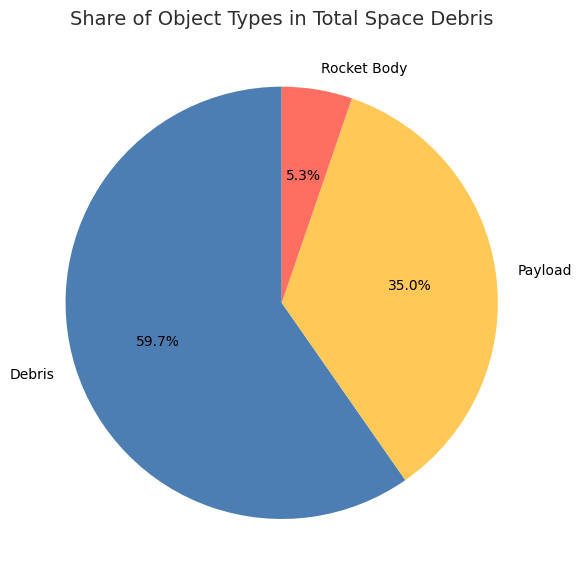

In [86]:
# Grouping data by object type to calculate total counts
object_type_counts = data['OBJECT_TYPE'].value_counts().reset_index()
object_type_counts.columns = ['OBJECT_TYPE', 'Count']

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
     object_type_counts['Count'],
    labels=object_type_counts['OBJECT_TYPE'],
    autopct='%1.1f%%',  # Show percentages
    startangle=90,  # Start pie chart at 90 degrees
    colors=[colors['Primary Blue'], colors['Star Gold'], colors['Rocket Red'], colors['Nebula Purple']]  # Assign colors
)

# Customizing the plot
plt.title('Share of Object Types in Total Space Debris', fontsize=14, color=colors['Vacuum Black'])
plt.tight_layout()

# Show the plot
plt.show()

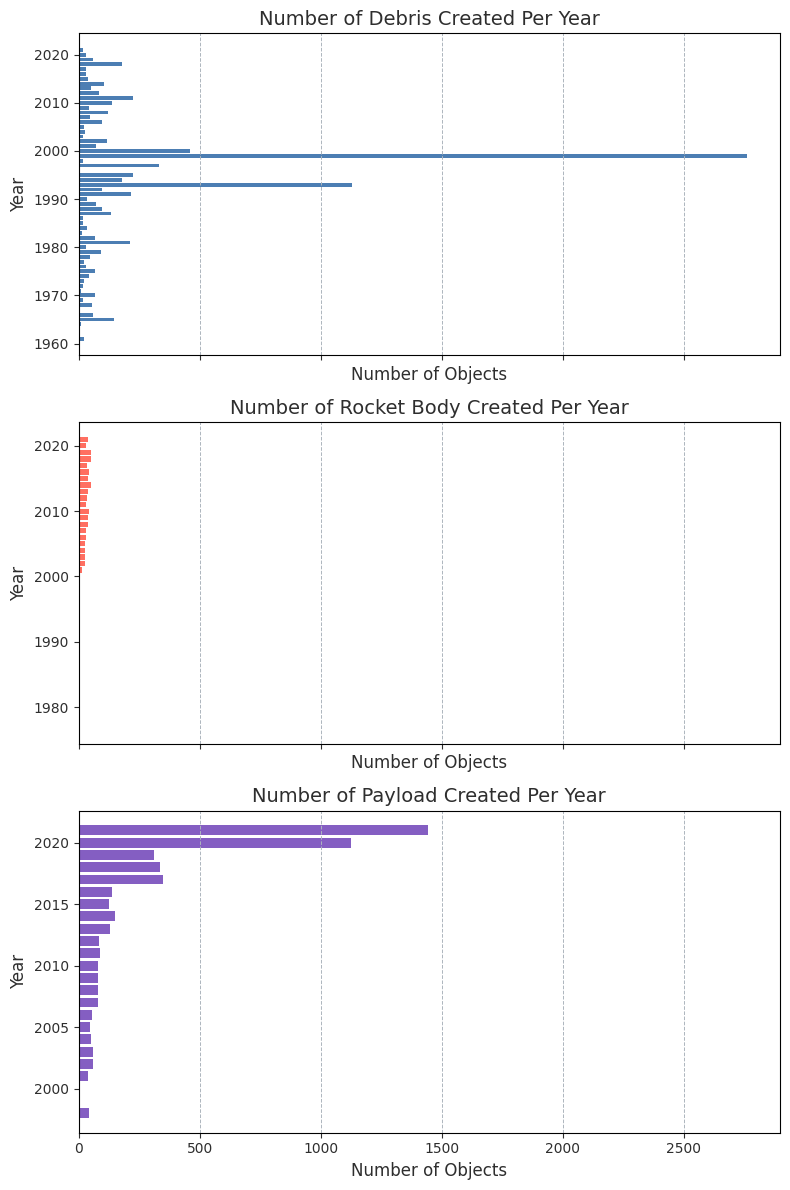

In [87]:
# Create subplots for horizontal bar plots
num_plots = len(object_types)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots), sharex=True)

for i, obj_type in enumerate(object_types):
    # Filter data for the specific object type
    subset = yearly_debris_by_type[yearly_debris_by_type['OBJECT_TYPE'] == obj_type]

    # Plot horizontal bars on the corresponding subplot
    axes[i].barh(subset['LAUNCH_DATE'], subset['Count'], color=type_colors[obj_type])

    # Customize the subplot
    axes[i].set_title(f'Number of {obj_type} Created Per Year', fontsize=14, color=colors['Vacuum Black'])
    axes[i].set_xlabel('Number of Objects', fontsize=12, color=colors['Vacuum Black'])
    axes[i].set_ylabel('Year', fontsize=12, color=colors['Vacuum Black'])
    axes[i].grid(axis='x', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
    axes[i].tick_params(axis='x', colors=colors['Vacuum Black'], labelsize=10)
    axes[i].tick_params(axis='y', colors=colors['Vacuum Black'], labelsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

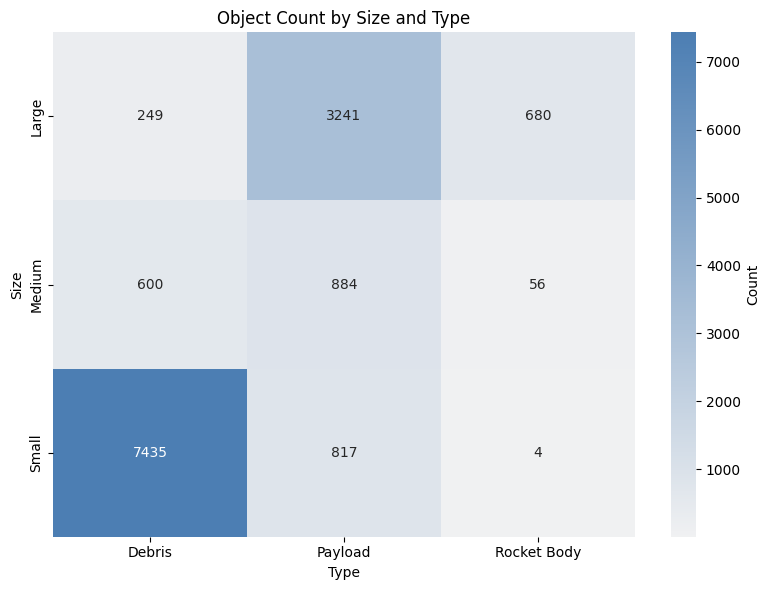

In [88]:
# Grouping and calculating counts
grouped_data = data.groupby(['RCS_SIZE', 'OBJECT_TYPE']).size().reset_index(name='Count')

# Pivot the data to create a matrix for the heatmap
heatmap_data = grouped_data.pivot(index='RCS_SIZE', columns='OBJECT_TYPE', values='Count').fillna(0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,  # Show values in cells
    fmt='g',  # General format for integer values
    cmap=sns.light_palette(colors['Primary Blue'], as_cmap=True), 
    cbar_kws={'label': 'Count'}  
)

# Customize the plot
plt.title('Object Count by Size and Type')
plt.xlabel('Type')
plt.ylabel('Size')
plt.tight_layout()

# Show the plot
plt.show()

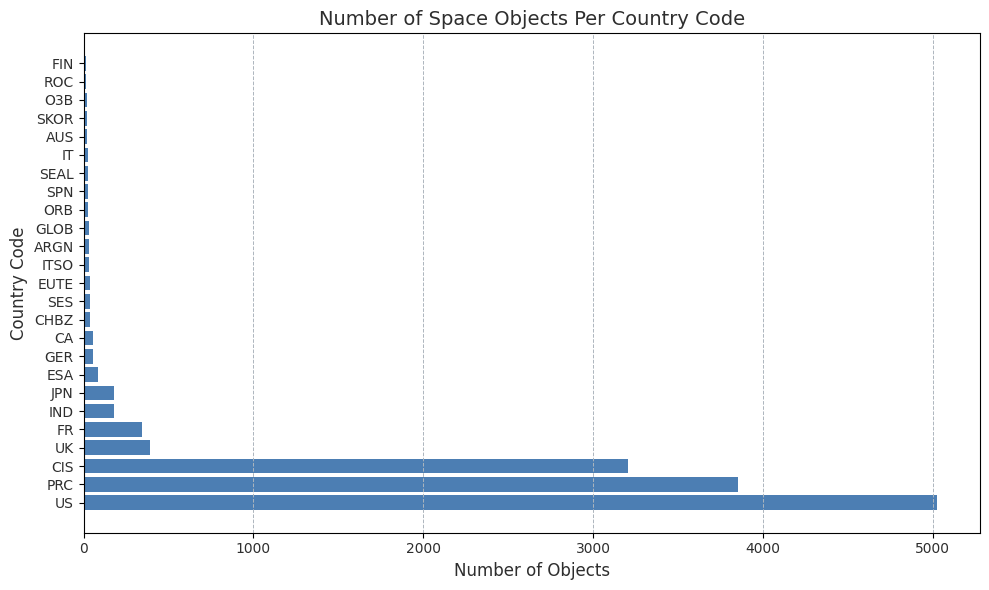

In [89]:
# Grouping data by country code to calculate the count of objects
country_code_counts = data.groupby('COUNTRY_CODE').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
top_25_countries = country_code_counts.head(25)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(top_25_countries['COUNTRY_CODE'], top_25_countries['Count'], color=colors['Primary Blue'])

# Customizing the plot
plt.title('Number of Space Objects Per Country Code', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Number of Objects', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Country Code', fontsize=12, color=colors['Vacuum Black'])
plt.grid(axis='x', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

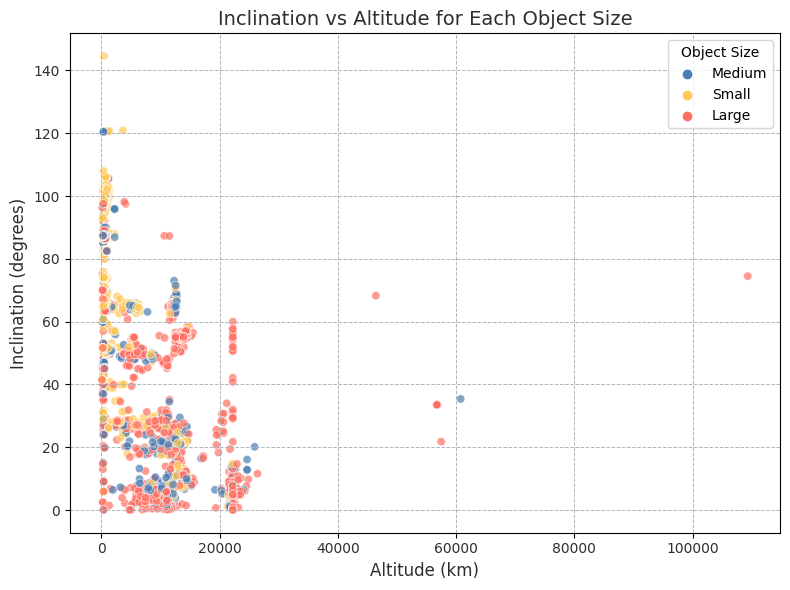

In [91]:
# plotting inclination vs altitude

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='ALTITUDE',
    y='INCLINATION',
    hue='RCS_SIZE',
    palette=[colors['Primary Blue'], colors['Star Gold'], colors['Rocket Red']],  # Color per size
    alpha=0.7  
    )

# Customizing the plot
plt.title('Inclination vs Altitude for Each Object Size', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Altitude (km)', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Inclination (degrees)', fontsize=12, color=colors['Vacuum Black'])
plt.grid(True, linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.legend(title='Object Size', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


### Loading Space mission data to analyze correlations

In [92]:
# load the space mission data
missions = pd.read_csv('Space_Corrected.csv.xls')
#missions.head()

In [93]:
# Cleaning up column names
missions.columns = missions.columns.str.strip()

# Convert date format to datetime
missions["Datum"] = pd.to_datetime(missions["Datum"], utc=True, errors='coerce')

# Extract the year for plotting
missions["Year"] = missions["Datum"].dt.year

# Counting the number of space missions per year
missions_per_year = missions.groupby('Year').size().reset_index(name='Mission Count')

# Counting the number of debris objects created per year
debris_per_year = data.groupby('LAUNCH_DATE').size().reset_index(name='Debris Count')

# Merging missions and debris counts on year
merged_data = pd.merge(missions_per_year, debris_per_year, left_on='Year', right_on='LAUNCH_DATE', how='inner')

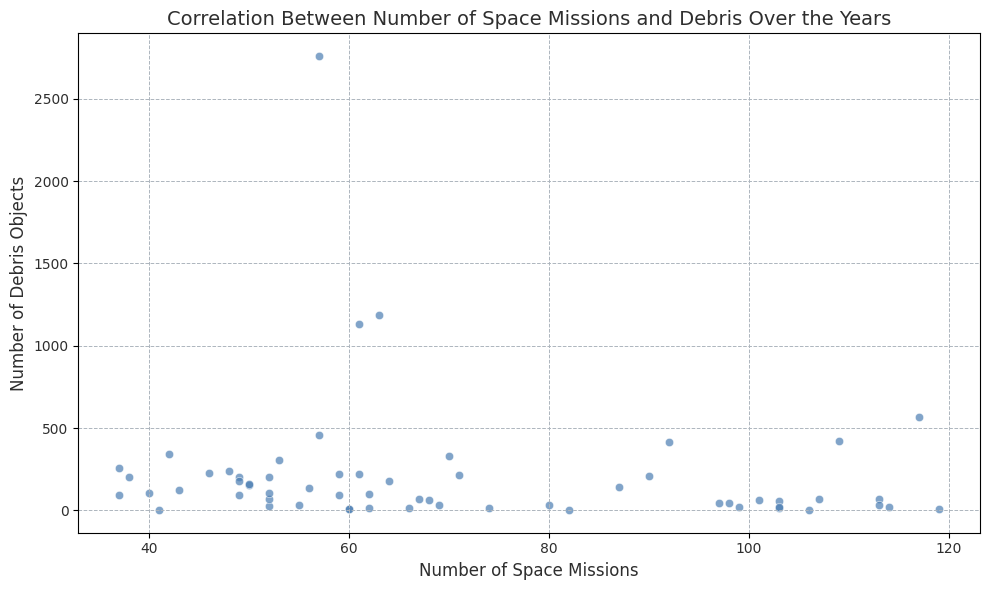

In [94]:
# Plot correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=merged_data['Mission Count'],
    y=merged_data['Debris Count'],
    color=colors['Primary Blue'],
    alpha=0.7
)

# Customizing the plot
plt.title('Correlation Between Number of Space Missions and Debris Over the Years', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Number of Space Missions', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Number of Debris Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(True, linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

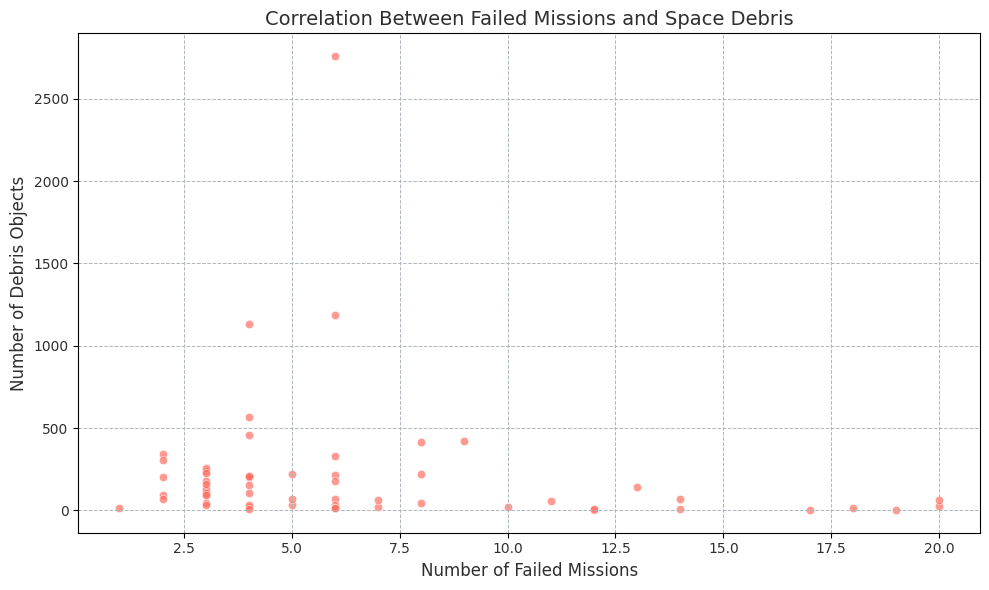

In [95]:
# Categorize missions into Success vs. Failure
missions['Mission Success'] = missions['Status Mission'].apply(lambda x: 1 if x == 'Success' else 0)

# Count successful and failed missions per year
missions_status_per_year = missions.groupby('Year')['Mission Success'].agg(['sum', 'count']).reset_index()
missions_status_per_year.columns = ['Year', 'Successful Missions', 'Total Missions']
missions_status_per_year['Failed Missions'] = missions_status_per_year['Total Missions'] - missions_status_per_year['Successful Missions']

# Merge with debris data
missions_debris_merged = pd.merge(missions_status_per_year, debris_per_year, left_on='Year', right_on='LAUNCH_DATE', how='inner')

# Plot Failed Missions vs. Debris Count
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=missions_debris_merged['Failed Missions'],
    y=missions_debris_merged['Debris Count'],
    color=colors['Rocket Red'],
    alpha=0.7
)

plt.title('Correlation Between Failed Missions and Space Debris', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Number of Failed Missions', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Number of Debris Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(True, linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.tight_layout()

plt.show()

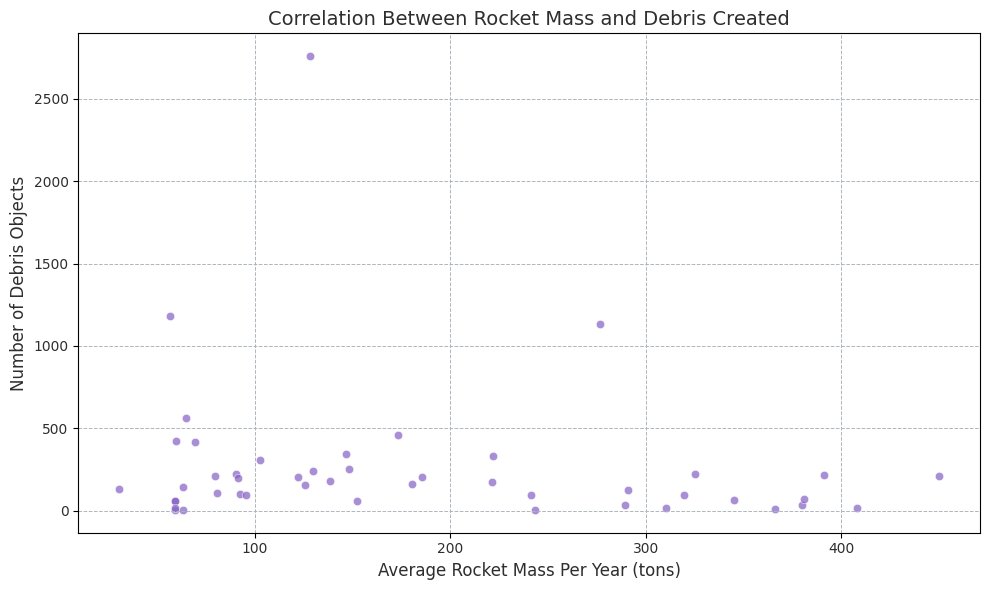

In [96]:
# Convert rocket mass to numeric values
missions['Rocket Mass'] = pd.to_numeric(missions['Rocket'], errors='coerce')

# Compute average rocket mass per year
rocket_mass_per_year = missions.groupby('Year')['Rocket Mass'].mean().reset_index()

# Merge with debris data
rocket_mass_debris = pd.merge(rocket_mass_per_year, debris_per_year, left_on='Year', right_on='LAUNCH_DATE', how='inner')

# Plot the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=rocket_mass_debris['Rocket Mass'],
    y=rocket_mass_debris['Debris Count'],
    color=colors['Nebula Purple'],
    alpha=0.7
)

plt.title('Correlation Between Rocket Mass and Debris Created', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Average Rocket Mass Per Year (tons)', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Number of Debris Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(True, linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.tight_layout()

plt.show()

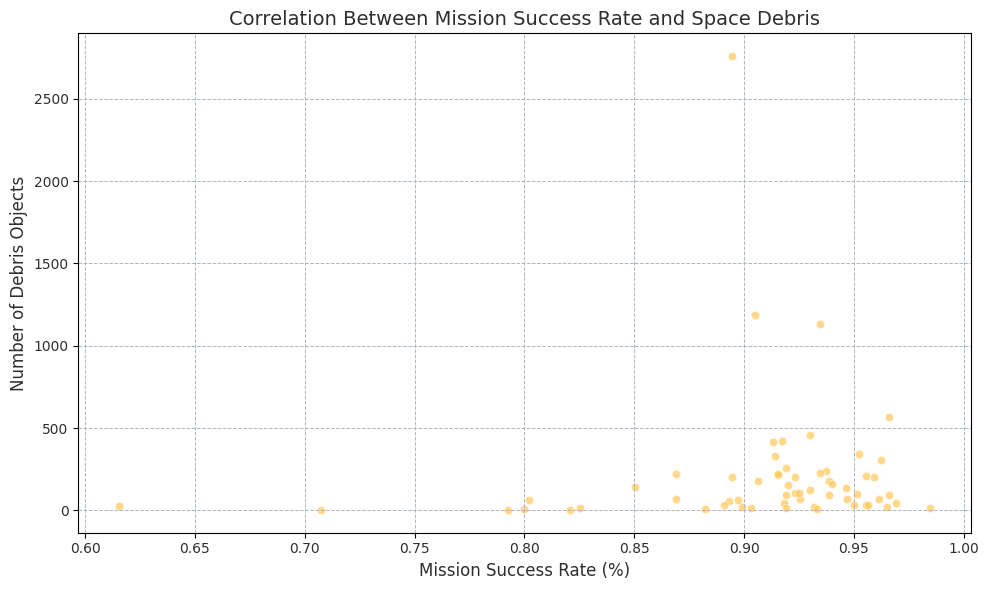

In [97]:
# Compute yearly success rate
missions_status_per_year['Success Rate'] = missions_status_per_year['Successful Missions'] / missions_status_per_year['Total Missions']

# Merge with debris data
success_rate_debris = pd.merge(missions_status_per_year, debris_per_year, left_on='Year', right_on='LAUNCH_DATE', how='inner')

# Plot the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=success_rate_debris['Success Rate'],
    y=success_rate_debris['Debris Count'],
    color=colors['Star Gold'],
    alpha=0.7
)

plt.title('Correlation Between Mission Success Rate and Space Debris', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Mission Success Rate (%)', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Number of Debris Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(True, linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.tight_layout()

plt.show()